### Freshman Year (2016) Visualizations

In [4]:
# module imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [5]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [6]:
# load in data
df = pd.read_csv('../data/full_matches.csv')

In [7]:
# filter out all other data
fr = df[df['season'] == 'FR']

#### EDA

In [8]:
fr.head()

,match_key,career_match_index,career_stage,season,season_match_number,date,day_of_week,week_of_season,days_since_last_match,match_no,total_matches_that_day,total_sets_that_day,multi_game_day,first_match_of_day,last_match_of_day,same_day_opponent_num,opponent,opponent_slug,season_opponent_num,is_repeat_opponent,deaf_school,match_type,event_name,milestone_flag,result,set_scores,set_count,set_result,set_diff,location,comeback_win,total_points_for,total_points_against,margin_pct,high_margin_win,low_margin_loss,did_play,played_all_sets,stats_available,season_highs_flags,career_highs_flags,record_breaker_flag,deciding_set_win,deciding_set_loss,low_error_game,win_streak,loss_streak,was_set_swept,swept_opponent,deciding_set_played,sets_played,kills,kills_per_set,kill_pct,kill_attempts,kill_errors,hit_pct,assists,assists_per_set,ball_handling_attempts,ball_handling_errors,solo_blocks,assisted_blocks,total_blocks,blocks_per_set,block_errors,digs,dig_errors,digs_per_set,receiving,receiving_errors,receiving_per_set,aces,aces_per_set,ace_pct,serve_attempts,serve_errors,serve_pct,points,maxpreps
0,FR_09-01_TA_1,1.0,early,FR,1,2016-09-01,Thursday,1,0,1,1,3,False,NaN,NaN,1,Takoma Academy,TA,1,False,False,regular,NaN,first MSSD match; first FR match,W,"25-22,25-19,25-13",3,3-0,3,away,False,75,54,0.163,False,False,True,True,True,NaN,NaN,False,False,False,False,1,0,False,True,False,3.0,5.0,1.7,20.0,25.0,6.0,-0.040,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,2.3,13.0,2.0,4.3,6.0,2.0,40.0,15.0,2.0,86.7,0.0,https://www.maxpreps.com/games/09-01-2016/voll...
1,FR_09-09_RCSA_1,2.0,early,FR,2,2016-09-09,Friday,2,8,1,3,6,True,True,False,1,River City Science Academy,RCSA,1,False,False,regular,FSDB Invitational 2016,NaN,W,"25-11,25-19",2,2-0,2,neutral,False,50,30,0.250,False,False,True,True,True,total_blocks,NaN,False,False,False,True,2,0,False,True,False,2.0,6.0,3.0,42.9,14.0,1.0,0.357,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.5,0.0,5.0,0.0,2.5,13.0,0.0,6.5,2.0,1.0,33.3,6.0,0.0,100.0,0.0,https://www.maxpreps.com/games/09-09-2016/voll...
2,FR_09-09_INTERLACHEN_2,3.0,early,FR,3,2016-09-09,Friday,2,0,2,3,6,True,False,False,1,Interlachen,INTERLACHEN,1,False,False,regular,FSDB Invitational 2016,NaN,W,"25-14,25-19",2,2-0,2,neutral,False,50,33,0.205,False,False,True,True,True,total_blocks,NaN,False,False,False,False,3,0,False,True,False,2.0,3.0,1.5,16.7,18.0,3.0,0.000,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.5,0.0,10.0,0.0,5.0,8.0,2.0,4.0,4.0,2.0,50.0,8.0,0.0,100.0,0.0,https://www.maxpreps.com/games/09-09-2016/voll...
3,FR_09-09_FSDB_3,4.0,early,FR,4,2016-09-09,Friday,2,0,3,3,6,True,False,True,1,Florida School for the Deaf & Blind,FSDB,1,False,True,regular,FSDB Invitational 2016,NaN,W,"26-24,25-14",2,2-0,2,away,False,51,38,0.146,False,False,True,True,True,total_blocks,NaN,False,False,False,False,4,0,False,True,False,2.0,3.0,1.5,20.0,15.0,4.0,-0.067,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.5,0.0,4.0,0.0,2.0,12.0,2.0,6.0,5.0,2.5,62.5,8.0,0.0,100.0,0.0,https://www.maxpreps.com/games/09-09-2016/voll...
4,FR_09-17_AIDB_1,5.0,early,FR,5,2016-09-17,Saturday,3,8,1,1,3,False,NaN,NaN,1,Alabama School for the Deaf,AIDB,1,False,True,regular,NaN,NaN,W,"25-21,25-13,25-11",3,3-0,3,home,False,75,45,0.250,False,False,True,True,True,kills,NaN,False,False,False,False,5,0,False,True,False,3.0,11.0,3.7,44.0,25.0,6.0,0.200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,3.3,12.0,0.0,4.0,2.0,0.7,22.2,9.0,1.0,88.9,0.0,https://www.maxpreps.com/games/09-17-2016/voll...


In [14]:
cols = ['day_of_week', 'week_of_season', 'days_since_last_match', 'multi_game_day', 'opponent', 'deaf_school',
        'match_type', 'result', 'set_result', 'location', 'did_play', 'played_all_sets', 'low_error_game']

for col in cols:
    print('value counts:')
    print(fr[col].value_counts())
    print('--------------------')

value counts:
day_of_week
Saturday     10
Friday        9
Thursday      6
Tuesday       6
Wednesday     4
Monday        1
Name: count, dtype: int64
--------------------
value counts:
week_of_season
6     9
4     7
7     4
8     4
2     3
3     2
10    2
11    2
1     1
5     1
9     1
Name: count, dtype: int64
--------------------
value counts:
days_since_last_match
0     12
1     10
3      6
2      4
8      2
7      1
12     1
Name: count, dtype: int64
--------------------
value counts:
multi_game_day
False    21
True     15
Name: count, dtype: int64
--------------------
value counts:
opponent
Sidwell Friends                             2
Woodrow Wilson                              2
California School for the Deaf              2
California School for the Deaf-Riverside    2
Riverdale Baptist                           2
Mississippi School for the Deaf             1
Spencerville Adventist Academy              1
Washington International                    1
Field                         

In [16]:
cols = ['total_matches_that_day', 'total_sets_that_day', 'set_diff', 'total_points_for', 'total_points_against',
        'margin_pct', 'win_streak', 'loss_streak', 'kills', 'assists', 'total_blocks', 'digs', 'receiving', 'aces']

for col in cols:
    print('summary:')
    print(round(fr[col].describe(), 2))
    print('--------------------')

summary:
count    36.00
mean      2.22
std       1.57
min       1.00
25%       1.00
50%       1.00
75%       3.25
max       5.00
Name: total_matches_that_day, dtype: float64
--------------------
summary:
count    36.00
mean      5.31
std       2.75
min       3.00
25%       3.00
50%       3.50
75%       7.50
max      10.00
Name: total_sets_that_day, dtype: float64
--------------------
summary:
count    36.00
mean      0.69
std       2.38
min      -3.00
25%      -2.00
50%       2.00
75%       3.00
max       3.00
Name: set_diff, dtype: float64
--------------------
summary:
count    36.00
mean     59.58
std      21.16
min       0.00
25%      49.50
50%      60.50
75%      75.00
max      97.00
Name: total_points_for, dtype: float64
--------------------
summary:
count     36.00
mean      49.94
std       20.17
min        0.00
25%       37.75
50%       50.00
75%       60.25
max      102.00
Name: total_points_against, dtype: float64
--------------------
summary:
count    35.00
mean      0.09
std

#### Visualizations

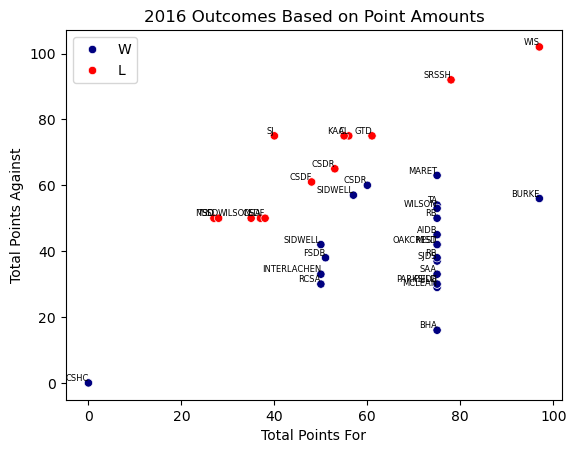

In [66]:
sns.scatterplot(x='total_points_for', y='total_points_against', hue='result', palette={'W':'navy','L':'red'}, data=fr)

for i, row in fr.iterrows():
    if pd.notna(row['total_points_for']) and pd.notna(row['total_points_against']):
        plt.text(
            row['total_points_for'],
            row['total_points_against'],
            row['opponent_slug'],
            fontsize=6,
            ha='right',
            va='bottom'
        )

plt.title(f"2016 Outcomes Based on Point Amounts")
plt.xlabel("Total Points For")
plt.ylabel("Total Points Against")
plt.legend()
plt.show()

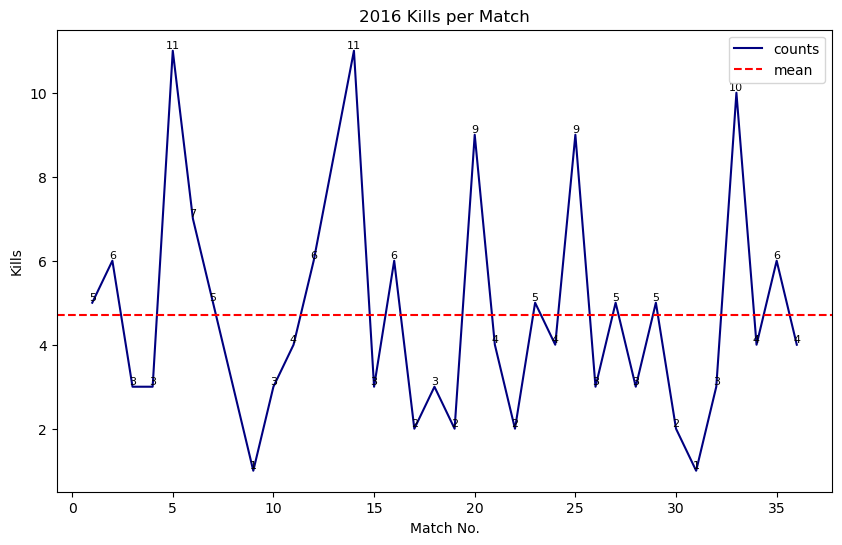

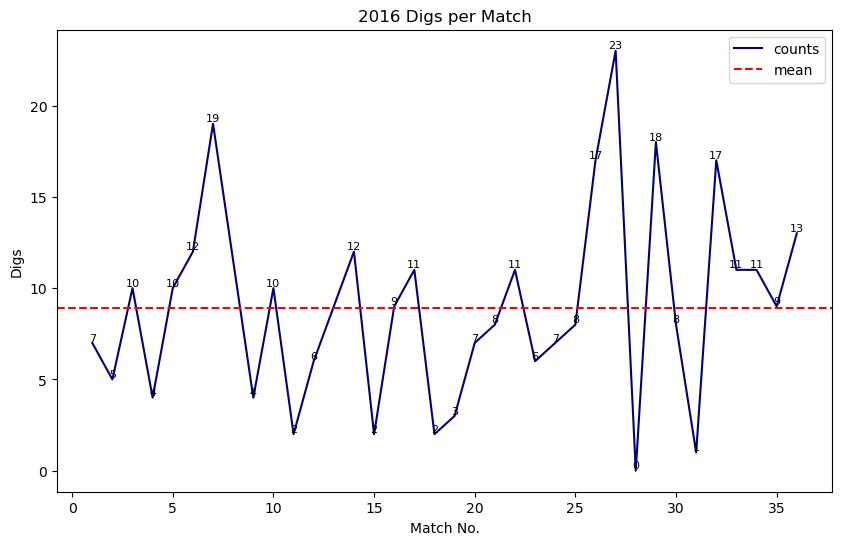

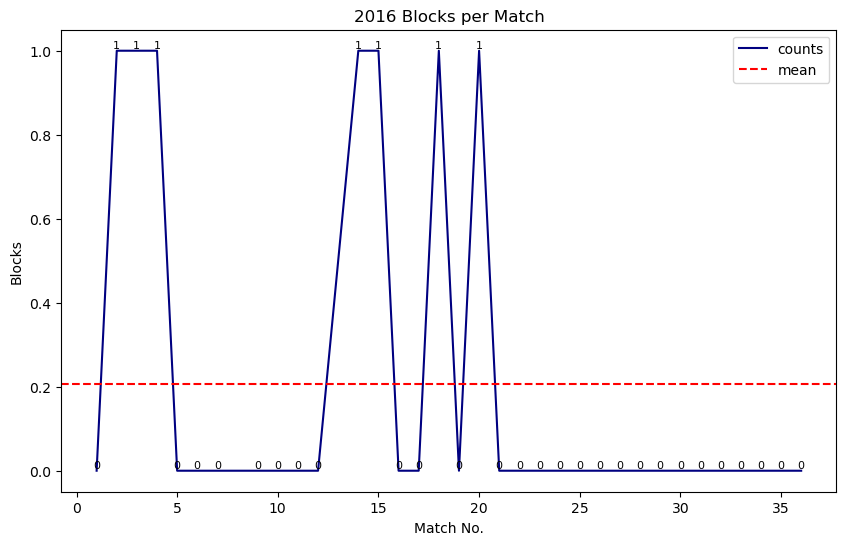

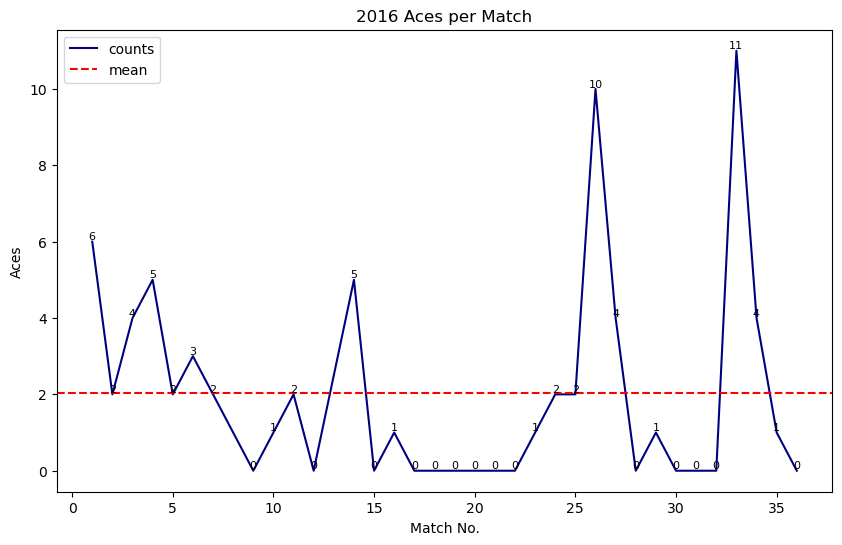

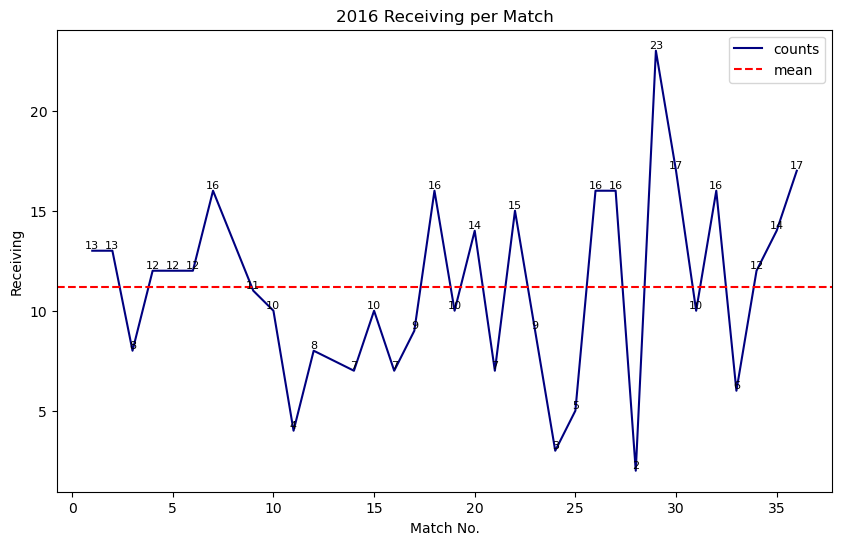

In [46]:
pretty_labels = ['Kills', 'Digs', 'Blocks', 'Aces', 'Receiving']
cols = ['kills', 'digs', 'total_blocks', 'aces', 'receiving']

for col, lbl in zip(cols, pretty_labels):
    plt.figure(figsize=(10, 6))

    sns.lineplot(data=fr, x="season_match_number", y=col, color='navy', label='counts')

    for i, row in fr.iterrows():
        if pd.notna(row[col]):
            plt.text(
                row['season_match_number'],
                row[col],
                str(int(row[col])),
                fontsize=8,
                ha='center',
                va='bottom'
            )

    plt.axhline(y=fr[col].mean(), color='red', linestyle='--', label='mean')

    plt.title(f"2016 {lbl} per Match")
    plt.xlabel("Match No.")
    plt.ylabel(lbl)
    plt.legend()
    plt.show()

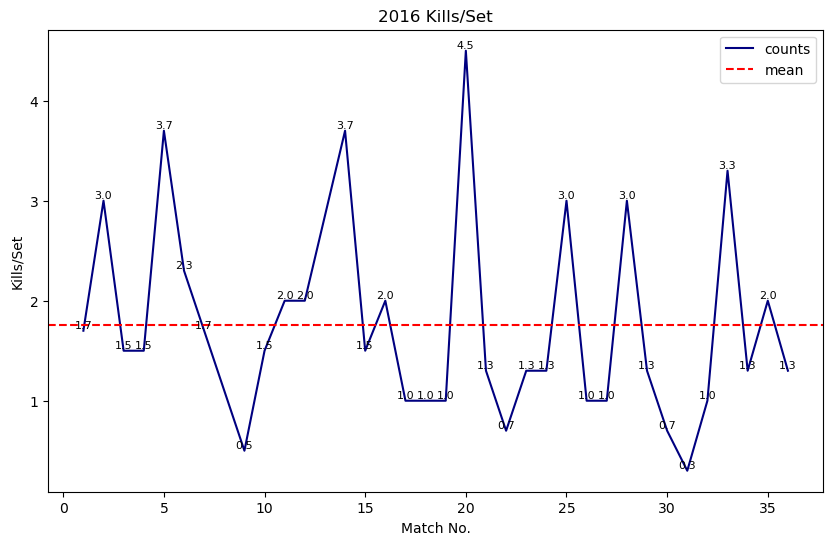

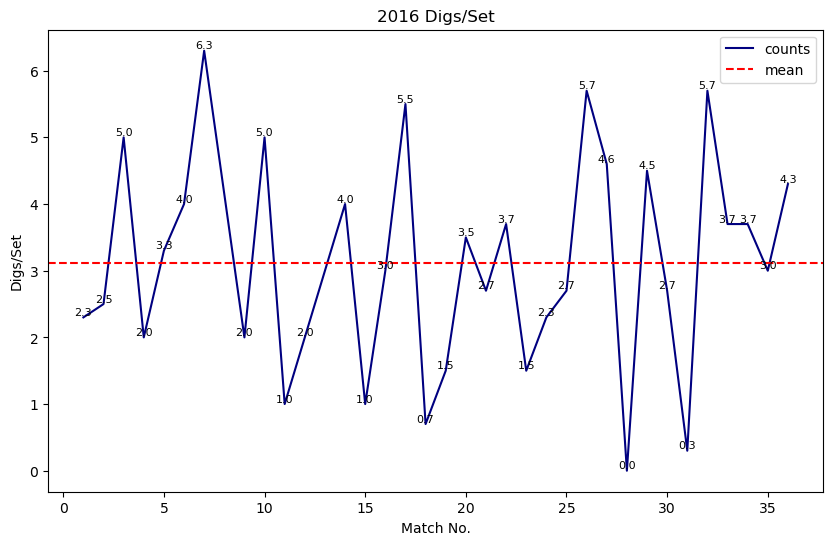

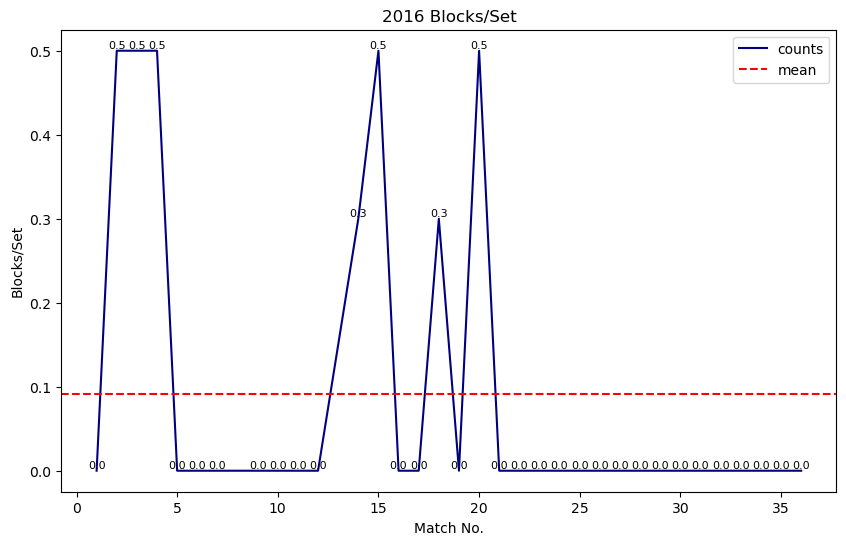

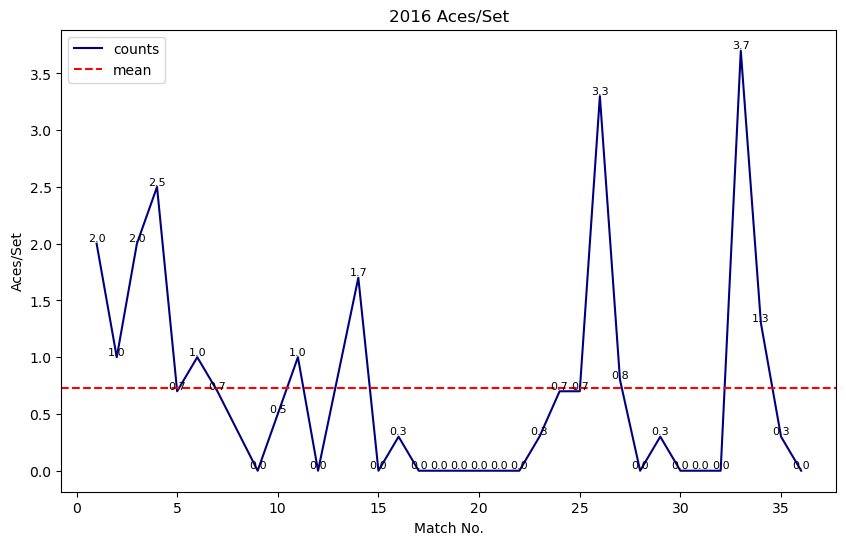

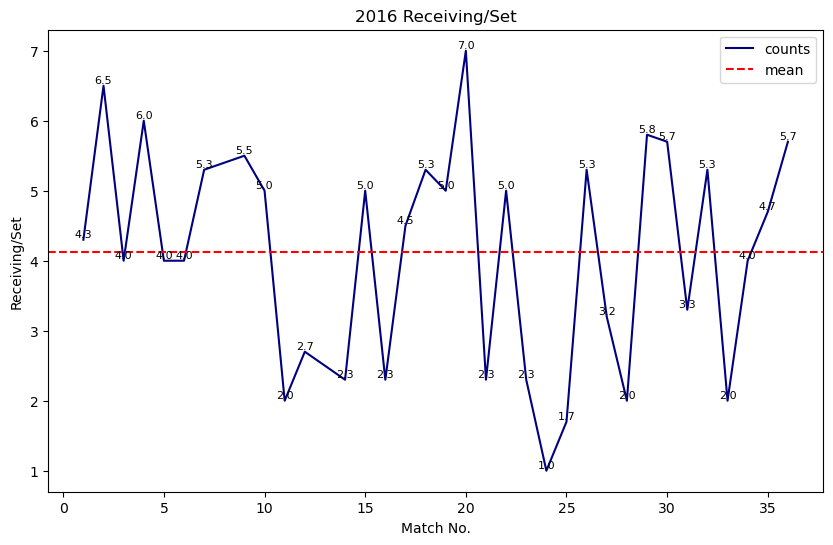

In [50]:
pretty_set_labels = ['Kills/Set', 'Digs/Set', 'Blocks/Set', 'Aces/Set', 'Receiving/Set']
cols_sets = ['kills_per_set', 'digs_per_set', 'blocks_per_set', 'aces_per_set', 'receiving_per_set']

for col, lbl in zip(cols_sets, pretty_set_labels):
    plt.figure(figsize=(10, 6))

    sns.lineplot(data=fr, x="season_match_number", y=col, color='navy', label='counts')

    for i, row in fr.iterrows():
        if pd.notna(row[col]):
            plt.text(
                row['season_match_number'],
                row[col],
                str(row[col]),
                fontsize=8,
                ha='center',
                va='bottom'
            )

    plt.axhline(y=fr[col].mean(), color='red', linestyle='--', label='mean')

    plt.title(f"2016 {lbl}")
    plt.xlabel("Match No.")
    plt.ylabel(lbl)
    plt.legend()
    plt.show()

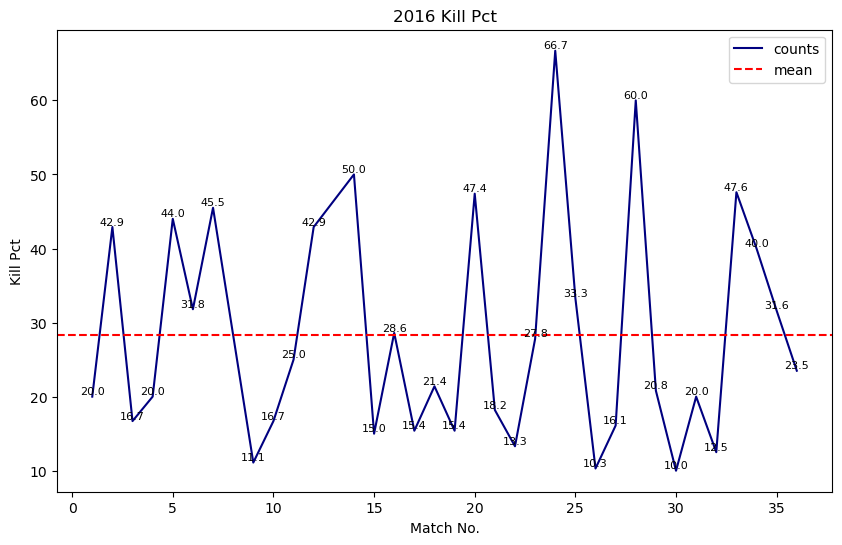

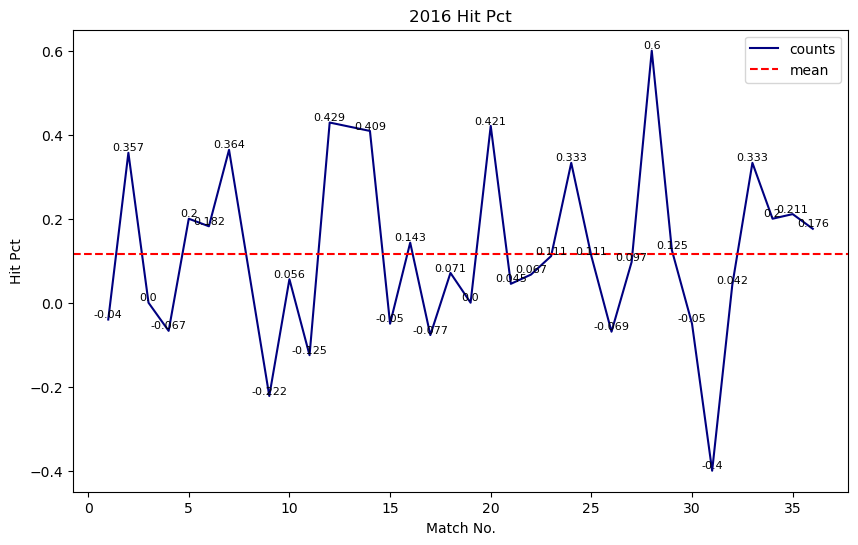

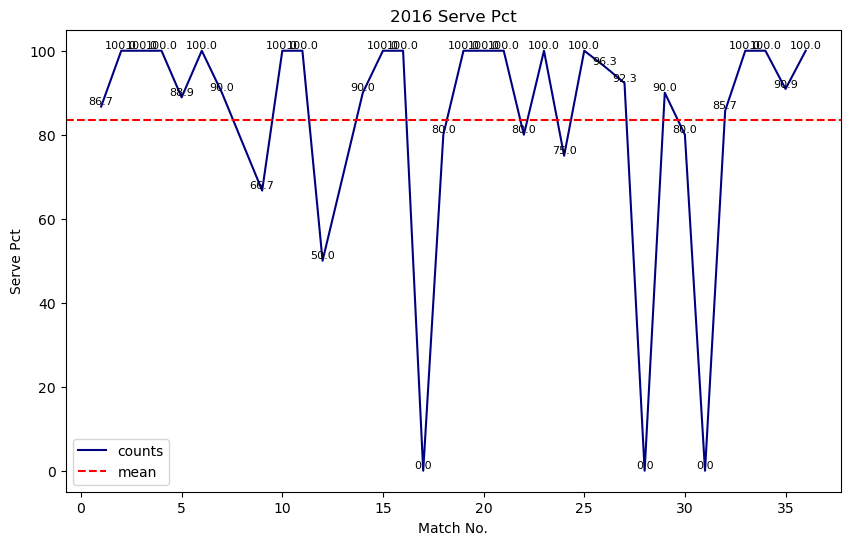

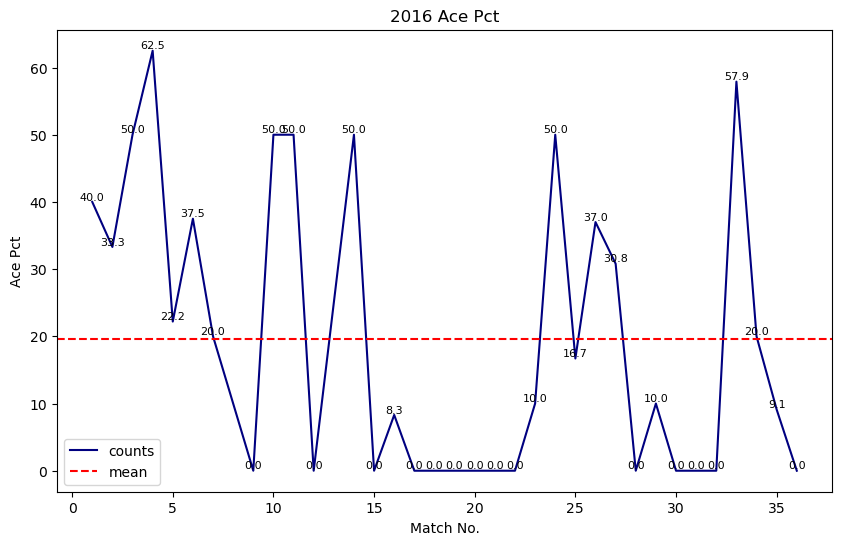

In [52]:
pretty_set_labels = ['Kill Pct', 'Hit Pct', 'Serve Pct', 'Ace Pct']
cols_sets = ['kill_pct', 'hit_pct', 'serve_pct', 'ace_pct']

for col, lbl in zip(cols_sets, pretty_set_labels):
    plt.figure(figsize=(10, 6))

    sns.lineplot(data=fr, x="season_match_number", y=col, color='navy', label='counts')

    for i, row in fr.iterrows():
        if pd.notna(row[col]):
            plt.text(
                row['season_match_number'],
                row[col],
                str(row[col]),
                fontsize=8,
                ha='center',
                va='bottom'
            )

    plt.axhline(y=fr[col].mean(), color='red', linestyle='--', label='mean')

    plt.title(f"2016 {lbl}")
    plt.xlabel("Match No.")
    plt.ylabel(lbl)
    plt.legend()
    plt.show()

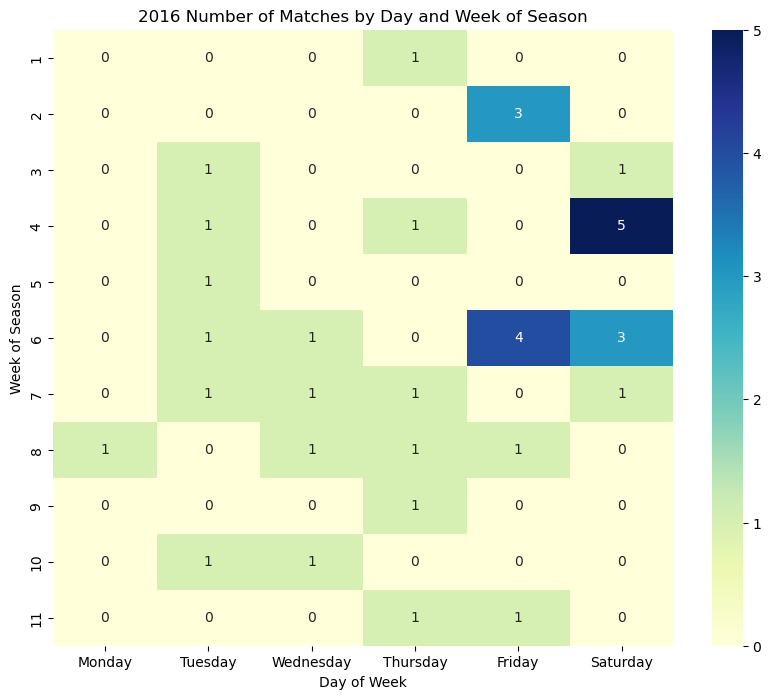

In [59]:
fr_copy = fr.copy()
days_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
fr_copy['day_of_week'] = pd.Categorical(fr['day_of_week'], categories=days_order, ordered=True)

matches_pivot = fr_copy.pivot_table(
    index='week_of_season', 
    columns='day_of_week', 
    values='match_no',
    aggfunc='count',
    fill_value=0,
    observed=False
)

plt.figure(figsize=(10, 8))
sns.heatmap(matches_pivot, annot=True, fmt="d", cmap="YlGnBu")
plt.title("2016 Number of Matches by Day and Week of Season")
plt.ylabel("Week of Season")
plt.xlabel("Day of Week")
plt.show()

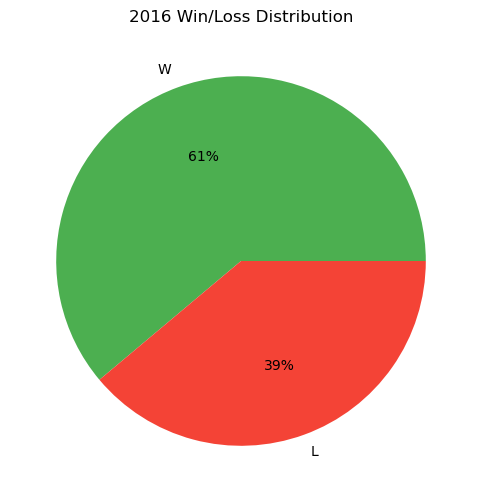

In [62]:
result_counts = fr['result'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    result_counts,
    labels=result_counts.index,
    autopct='%.0f%%',
    colors=['#4CAF50', '#F44336']
)
plt.title("2016 Win/Loss Distribution")
plt.show()

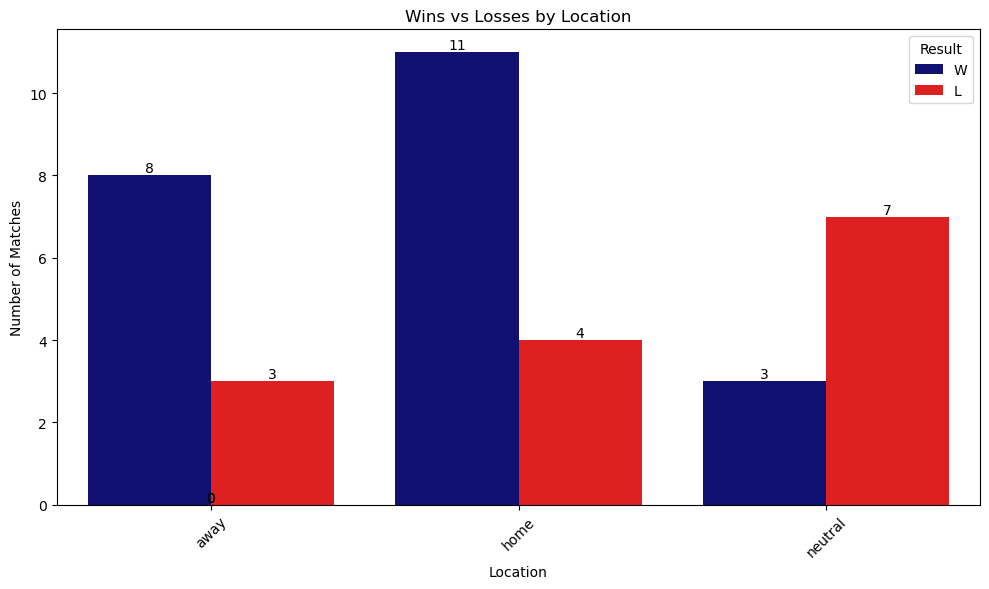

In [67]:
fr_copy['win_flag'] = (fr['result'] == 'W').astype(int)

category_col = 'location'

counts = pd.crosstab(fr[category_col], fr['result'])

counts = counts[['W','L']]

counts_melted = counts.reset_index().melt(id_vars=category_col, value_vars=['W','L'], 
                                          var_name='Result', value_name='Count')

plt.figure(figsize=(10,6))
ax = sns.barplot(data=counts_melted, x=category_col, y='Count', hue='Result', palette={'W':'navy','L':'red'})
plt.title(f"Wins vs Losses by {category_col.capitalize()}")
plt.ylabel("Number of Matches")
plt.xlabel(category_col.capitalize())
plt.xticks(rotation=45)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', 
                fontsize=10, color='black')
    
plt.legend(title="Result")
plt.tight_layout()
plt.show()

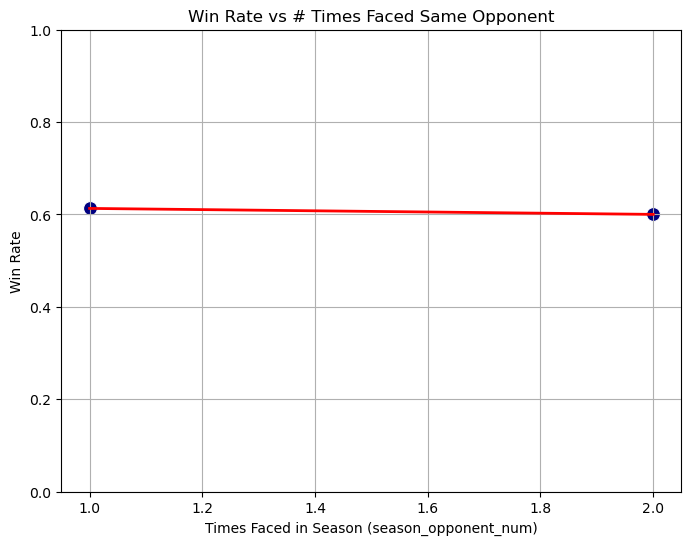

In [69]:
perf = fr_copy.groupby('season_opponent_num')['win_flag'].agg(['sum','count']).reset_index()
perf['win_rate'] = perf['sum'] / perf['count']

plt.figure(figsize=(8,6))
sns.scatterplot(data=perf, x='season_opponent_num', y='win_rate', s=100, color='navy')
sns.lineplot(data=perf, x='season_opponent_num', y='win_rate', color='red', linewidth=2)

plt.title("Win Rate vs # Times Faced Same Opponent")
plt.xlabel("Times Faced in Season (season_opponent_num)")
plt.ylabel("Win Rate")
plt.ylim(0,1)
plt.grid(True)
plt.show()

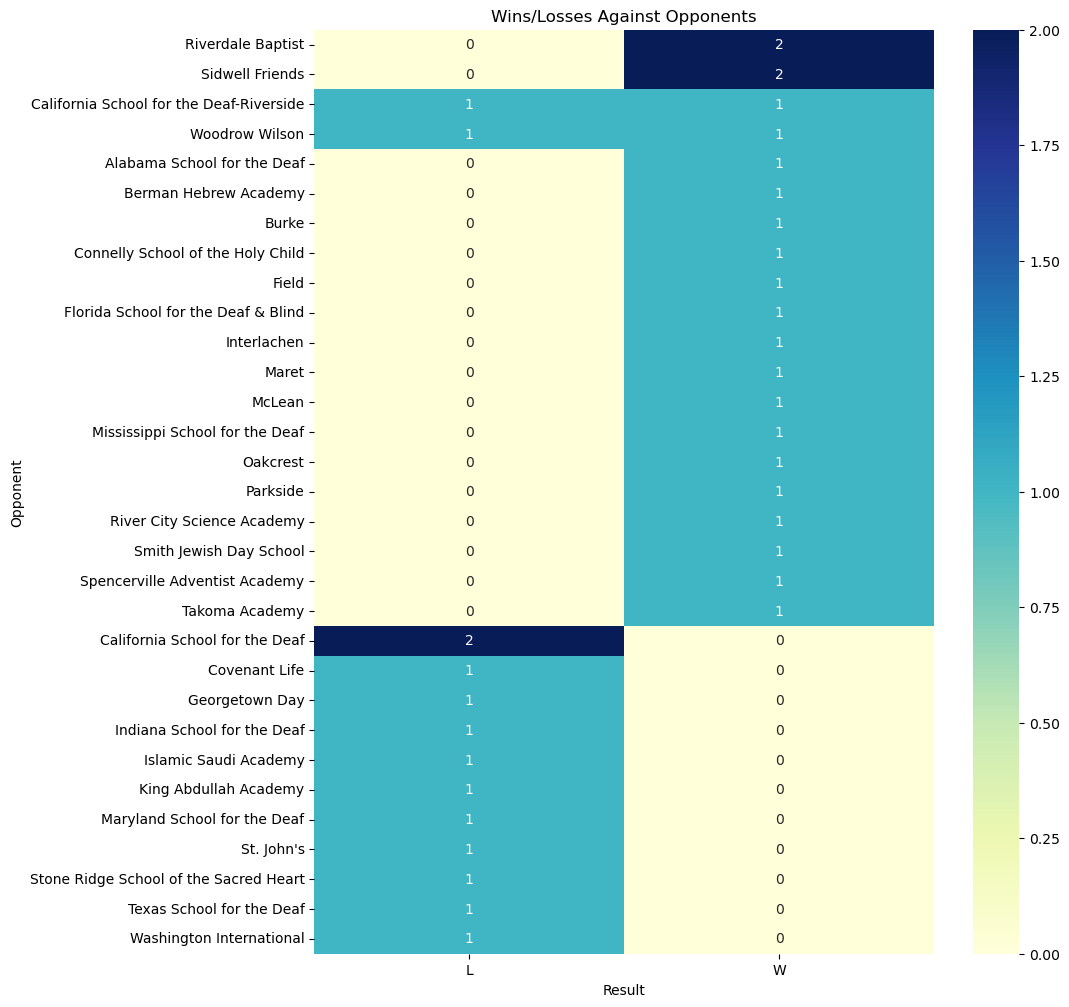

In [70]:
opponent_heat = pd.crosstab(fr['opponent'], fr['result'])

opponent_heat = opponent_heat.sort_values(by=['W','L'], ascending=False)

plt.figure(figsize=(10,12))
sns.heatmap(opponent_heat, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Wins/Losses Against Opponents")
plt.xlabel("Result")
plt.ylabel("Opponent")
plt.show()